# WeatherPy
----

### *Important Note - Please Read*
When we went over gmaps in class, nearly everyone was having trouble getting it to run properly. It would also occasionally cause jupyter notebooks to stop working. So our instructor informed us that we would not need to do Part 2 - VacationPy in this assignment. That is why it is not included in the repo.

### Observations
* Overall, the plots created here are good, clear visualizations of how temperature increases the closer you are to the equator. The plot comparing latitude and max temperature is the best depiction of this with how clear the trend is (max temperatures increase at latitudes close to 0.
* The other plots that use humidity, cloudiness, and wind speed to compare with latitude do not have trends as clear as the max temperatures plot. However, if you look close enough at the humidity and wind speed plots, you will see differences in the cities with latitudes close to 0 compared to those further from 0.
* While the correlations between humidity and windspeed and latitude are slight, there seems to be no correlation at all between cloudiness and latitude. Even when observed closely, cities with latitudes closer to 0 do not seem to have different percentages in cloudiness compared to the rest of the cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Create query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Lists that will store each city's data
name = []
lat = []
lon = []
max_temp = []
humid = []
clouds = []
wind = []
country = []
date = []

#Create counter for loop
count = 1

print("Beginning Data Retrieval")
print("--------------------------------")

# Loop through each city in the cities list
for city in cities:
    # Get url response for current city and turn the response into a JSON object
    response = requests.get(query_url + city).json()
    
    # Print log for the city as it's being processed
    print(f"Processing Record {count} | {city}")
    
    # For the current city, try to append its data to the corresponding list
    try:
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    # If the city is not found in the API, skip it    
    except KeyError:
        
        print("City not found. Skipping...")
        
    count = count + 1
    
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | aripuana
Processing Record 2 | provideniya
Processing Record 3 | boyolangu
Processing Record 4 | aketi
Processing Record 5 | erzin
Processing Record 6 | yar-sale
Processing Record 7 | lorengau
Processing Record 8 | ushuaia
Processing Record 9 | bengkulu
Processing Record 10 | gantt
Processing Record 11 | lincoln
Processing Record 12 | puerto ayora
Processing Record 13 | carnarvon
Processing Record 14 | griffith
Processing Record 15 | taolanaro
City not found. Skipping...
Processing Record 16 | mar del plata
Processing Record 17 | hermanus
Processing Record 18 | umzimvubu
City not found. Skipping...
Processing Record 19 | hilo
Processing Record 20 | mataura
Processing Record 21 | kapaa
Processing Record 22 | ilulissat
Processing Record 23 | hami
Processing Record 24 | rikitea
Processing Record 25 | butaritari
Processing Record 26 | atuona
Processing Record 27 | longyearbyen
Processing Record 28 | freeport
Pr

Processing Record 230 | chapais
Processing Record 231 | kedgwick
Processing Record 232 | lavrentiya
Processing Record 233 | port elizabeth
Processing Record 234 | soria
Processing Record 235 | ayer itam
City not found. Skipping...
Processing Record 236 | vila velha
Processing Record 237 | belushya guba
City not found. Skipping...
Processing Record 238 | belyy yar
Processing Record 239 | zambezi
Processing Record 240 | kupang
Processing Record 241 | kangaatsiaq
Processing Record 242 | wicklow
Processing Record 243 | kirakira
Processing Record 244 | salihorsk
Processing Record 245 | waspan
Processing Record 246 | kolokani
Processing Record 247 | mount isa
Processing Record 248 | biak
Processing Record 249 | zachagansk
City not found. Skipping...
Processing Record 250 | witu
Processing Record 251 | hit
Processing Record 252 | kutum
Processing Record 253 | cabo san lucas
Processing Record 254 | lydenburg
Processing Record 255 | salalah
Processing Record 256 | mayo
Processing Record 257 | s

Processing Record 461 | caninde
Processing Record 462 | buraydah
Processing Record 463 | tuatapere
Processing Record 464 | ikalamavony
Processing Record 465 | adrar
Processing Record 466 | gat
Processing Record 467 | cascais
Processing Record 468 | comodoro rivadavia
Processing Record 469 | marmaris
Processing Record 470 | washington
Processing Record 471 | paka
Processing Record 472 | nokia
Processing Record 473 | portland
Processing Record 474 | labuan
Processing Record 475 | nanortalik
Processing Record 476 | banting
Processing Record 477 | stonewall
Processing Record 478 | kieta
Processing Record 479 | brownsville
Processing Record 480 | hambantota
Processing Record 481 | zelenogorskiy
Processing Record 482 | palabuhanratu
City not found. Skipping...
Processing Record 483 | kaspiyskiy
Processing Record 484 | smoky lake
Processing Record 485 | chagda
City not found. Skipping...
Processing Record 486 | manaure
Processing Record 487 | terney
Processing Record 488 | pavagada
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Using the lists containing the raw data, create columns for a dataframe
columns = {
    'City': name,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': max_temp,
    'Humidity': humid,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Country': country,
    'Date': date
}
# Create dataframe using the columns we just created
cities_df = pd.DataFrame(columns)

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aripuanã,-9.1667,-60.6333,22.50,97,43,0.44,BR,1619232544
1,Provideniya,64.3833,-173.3000,3.99,63,31,1.82,RU,1619232544
2,Boyolangu,-8.1181,111.8935,28.67,62,2,2.14,ID,1619232545
3,Aketi,2.7388,23.7833,20.97,99,100,0.66,CD,1619232545
4,Erzin,36.9559,36.2000,16.11,58,33,2.45,TR,1619232546


In [6]:
# Create summary table for further analysis
cities_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.162143,10.524241,15.869700,69.978836,53.102293,3.324462,1.619233e+09
std,32.355517,87.988570,10.231101,22.678181,39.085981,2.226783,1.002228e+02
min,-54.800000,-179.166700,-12.000000,8.000000,0.000000,0.060000,1.619232e+09
25%,-5.257750,-68.552950,7.565000,58.000000,12.500000,1.740000,1.619233e+09
50%,25.519800,15.159400,16.780000,75.000000,56.000000,2.620000,1.619233e+09
75%,49.316900,83.041900,25.000000,88.000000,91.500000,4.255000,1.619233e+09
max,78.218600,179.316700,33.330000,100.000000,100.000000,14.840000,1.619233e+09


In [7]:
# Save the dataframe to a csv file
cities_df.to_csv(r'output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
According to the summary table, the maximum value for humidity is 100. There are no cities with humidity > 100%, so we do not need to remove any outliers.

In [8]:
# Use summary table to see if the max temp is greater than 100 (meaning there are potential outliers)
cities_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.162143,10.524241,15.869700,69.978836,53.102293,3.324462,1.619233e+09
std,32.355517,87.988570,10.231101,22.678181,39.085981,2.226783,1.002228e+02
min,-54.800000,-179.166700,-12.000000,8.000000,0.000000,0.060000,1.619232e+09
25%,-5.257750,-68.552950,7.565000,58.000000,12.500000,1.740000,1.619233e+09
50%,25.519800,15.159400,16.780000,75.000000,56.000000,2.620000,1.619233e+09
75%,49.316900,83.041900,25.000000,88.000000,91.500000,4.255000,1.619233e+09
max,78.218600,179.316700,33.330000,100.000000,100.000000,14.840000,1.619233e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

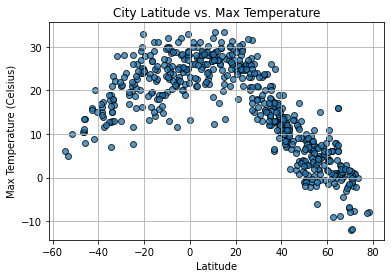

In [31]:
# Create scatter plot comparing latitude and max temp and format
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Latitude vs. Max Temperature")
# Add grid
plt.grid()
# Save plot to png file
plt.savefig('output_data/Fig1.png')

This plot compares the latitude and max temperature of each city. This helps visualize how temperatures are higher the closer you are to the equator (where latitudes are closer to 0).

## Latitude vs. Humidity Plot

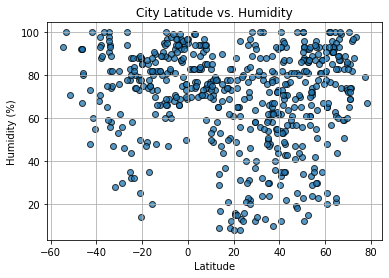

In [32]:
# Create scatter plot comparing latitude and humidity and format
plt.scatter(cities_df['Lat'], cities_df['Humidity'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
# Add grid
plt.grid()
# Save plot to png file
plt.savefig('output_data/Fig2.png')

Though this plot is not quite as clear as the previous one, this shows that humidity levels are also higher the closer you are to the equator.

## Latitude vs. Cloudiness Plot

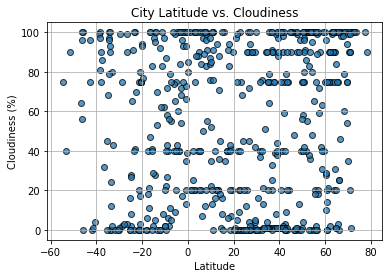

In [33]:
# Create scatter plot comparing latitude and cloudiness and format
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
# Add grid
plt.grid()
# Save plot to png file
plt.savefig('output_data/Fig3.png')

Cloudiness compared to latitude is much more varied. There does not appear to be a clear trend or correlation between the two.

## Latitude vs. Wind Speed Plot

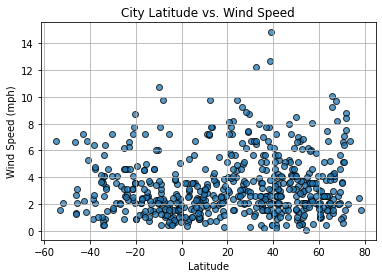

In [34]:
# Create scatter plot comparing latitude and wind speed and format
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
# Add grid
plt.grid()
# Save plot to png file
plt.savefig('output_data/Fig4.png')

Similar to the previous plot, wind speed compared to latitude is pretty varied. However, there does appear to be a slight dip in wind speeds in cities between 0 and 20 degrees latitude.

## Linear Regression

In [17]:
# Create dataframe containing cities located in the northern hemisphere by grabbing any city with latitudes greater than
# or equal to zero
north_hem = cities_df.loc[cities_df['Lat'] >= 0, ['Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

north_hem

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,64.3833,3.99,63,31,1.82
3,2.7388,20.97,99,100,0.66
4,36.9559,16.11,58,33,2.45
5,66.8333,0.18,99,98,3.83
9,34.8001,12.22,50,1,0.46
...,...,...,...,...,...
561,34.7334,17.00,48,90,2.06
562,64.8989,7.42,83,84,3.82
563,37.7667,15.00,67,75,6.69
564,49.9811,2.70,56,56,1.65


In [18]:
# Create dataframe containing cities located in the southern hemisphere by grabbing any city with latitudes less than zero
south_hem = cities_df.loc[cities_df['Lat'] < 0, ['Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

south_hem

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,-9.1667,22.50,97,43,0.44
2,-8.1181,28.67,62,2,2.14
6,-2.0226,27.56,79,93,3.46
7,-54.8000,6.00,93,75,6.69
8,-3.8004,28.16,66,100,0.60
...,...,...,...,...,...
552,-22.6667,24.37,74,70,4.65
554,-38.3833,14.44,93,97,2.68
557,-18.4192,18.80,47,0,1.20
559,-0.2167,21.72,97,100,1.90


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8147471167050491


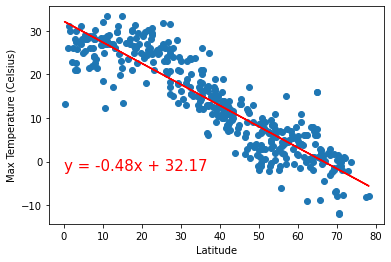

In [19]:
# Create x and y values for plot and linear regression calculation
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-2), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4186766171874116


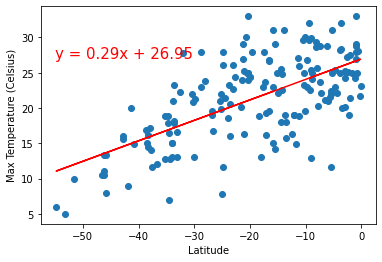

In [20]:
# Create x and y values for plot and linear regression caluclation
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,27), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

The distinction between the northern and southern hemispheres in terms of max temperature is pretty clear. In the northern hemisphere, max temperature decreases as latitude increases. In the southern hemisphere, max temperature increases as latitude increases. This is another good visualization of how temperatures increase the closer you are to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01043998644836829


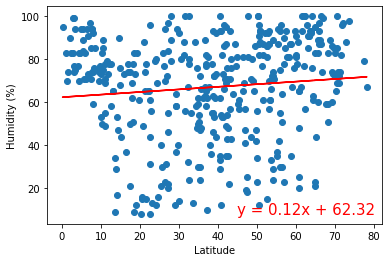

In [21]:
# Create x and y values for plot and linear regression calculation
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,8), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.008311873803984503


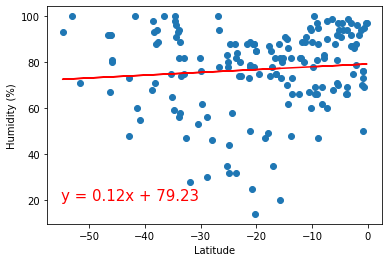

In [22]:
# Create x and y values for plot and linear regression calculation
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

Similar to the original humidity vs. latitude plot, these two plots show little to no distinction. The linear regression on both of these is very slight. However, both plots do show that latitudes closer to 0 have a humidity percentage of 60 or above.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.024717239037405532


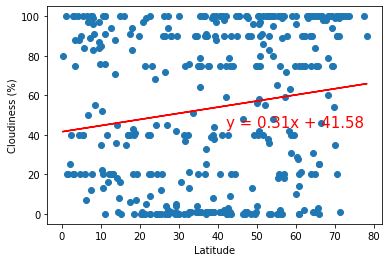

In [23]:
# Create x and y values for plot and linear regression calculation
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (42,44), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00037776901705344017


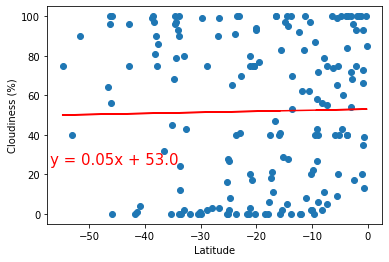

In [24]:
# Create x and y values for plot and linear regression calculation
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-57,25), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

These plots give the same impression as the original one. Cloudiness does not seem to be correlated with latitude. The linear regressions are very slight, and there is no clear trend in either plot.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003165361530888279


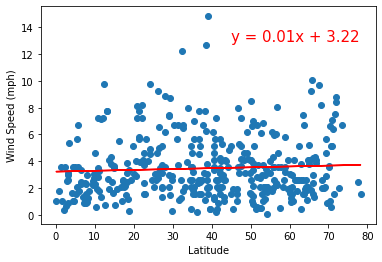

In [25]:
# Create x and y values for plot and linear regression calculation
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,13), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03675461531268028


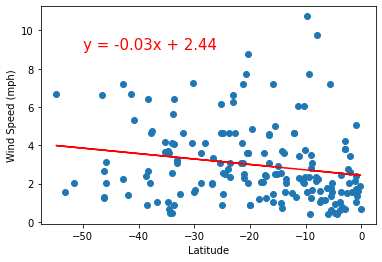

In [26]:
# Create x and y values for plot and linear regression calculation
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
# Calculate linear regression and regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Create scatter plot with regression line and equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,9), fontsize=15, color="red")
# Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.show()

There is a very slight increase in wind speed in the northern hemisphere the further you get from zero. Similarly, there is a slight decrease in wind speed in the southern hemisphere the further you get from zero. Both of these plots show that cities with latitudes close to zero have lesser wind speeds.